In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import scipy
import math
import lmfit

In [2]:
def Exp_dist(dt, lam, s):
    return s*np.exp(-lam*dt)

In [3]:
def remove_extra(times_up, times_down):
    times_up_short = []
    for i in range(len(times_up)):
        close = min( np.abs(times_up[i]*np.ones(times_down.shape[0])- times_down) ) < 5
        if close == True:
            times_up_short.append(times_up[i])
    times_up_short = np.array(times_up_short)
    times_down_short = []
    
    for i in range(len(times_down)):
        close = min( np.abs(times_down[i]*np.ones(times_up_short.shape[0])- times_up_short) ) < 5
        if close == True:
            times_down_short.append(times_down[i])
    times_down_short = np.array(times_down_short)
    return times_up_short, times_down_short

def read_times(file, logplot = False):

    ## up  
    SiPMs_up = []
    Coincident_IDs_up = []
    times_up = []

    file_up = "data/up/"+file
    
    with open(file_up) as f:
        for line in f:
            if '#' not in line.strip():
                times_up.append(float(line.split()[3])/1000)
                SiPMs_up.append(float(line.split()[6]))
                Coincident_IDs_up.append(int(line.split()[10]))
    times_up = np.array(times_up)
    SiPMs_up = np.array(SiPMs_up)
    Coincident_IDs_up = np.array(Coincident_IDs_up)
    mask_co_up = Coincident_IDs_up==1


    ## down  
    SiPMs_down = []
    Coincident_IDs_down = []
    times_down = []

    file_down = "data/down/"+file
    
    with open(file_down) as f:
        for line in f:
            if '#' not in line.strip():
                times_down.append(float(line.split()[3])/1000)
                SiPMs_down.append(float(line.split()[6]))
                Coincident_IDs_down.append(int(line.split()[10]))
    times_down = np.array(times_down)
    SiPMs_down = np.array(SiPMs_down)
    Coincident_IDs_down = np.array(Coincident_IDs_down)
    mask_co_down = Coincident_IDs_down==1

    
    times_up_short, times_down_short = remove_extra(times_up[mask_co_up], times_down[mask_co_down])

    return times_up_short, times_down_short

In [23]:
def fit_rate(times_up_short, times_down_short, times_bin = np.linspace(0,800,50)):
    print(times_up_short.shape[0])
    print(times_up_short.shape[0]/(times_up_short[-1] - times_up_short[0]))
    
    print(times_down_short.shape[0])
    print(times_down_short.shape[0]/(times_down_short[-1] - times_down_short[0]))
    
    Deltat_up = times_up_short[1:] - times_up_short[:-1]
    Deltat_down = times_down_short[1:] - times_down_short[:-1]
    
    
    plt.hist(Deltat_up, times_bin)
    plt.show
    
    
    #### fitting
    Deltat_up_hist, be = np.histogram(Deltat_up, times_bin)
    bc = 0.5*(be[1:]+be[:-1])
    Deltat_up_err = np.sqrt(Deltat_up_hist)
    
    mask = Deltat_up_hist != 0
    
    Deltat_up_hist = Deltat_up_hist[mask]
    Deltat_up_err = Deltat_up_err[mask]
    bc = bc[mask]
    
    
    Exp_model = lmfit.Model(Exp_dist)
    result = Exp_model.fit(Deltat_up_hist, dt=bc, lam=0.006, s =10, weights=1.0/Deltat_up_err)
    
    lmfit.report_fit(result)
    plt.figure()
    result.plot()
    plt.xlabel(r"$\Delta t$")
    #plt.xticks(bin_centers)
    plt.ylabel("Normalized Counts")
    plt.show()
    
    lam = result.params['lam'].value
    lam_err = result.params['lam'].stderr

    return lam, lam_err

619
0.007464841080889692
619
0.007464819385559502
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 40
    # variables        = 2
    chi-square         = 28.8857937
    reduced chi-square = 0.76015247
    Akaike info crit   = -9.02118183
    Bayesian info crit = -5.64342292
    R-squared          = 0.96553520
[[Variables]]
    lam:  0.00781922 +/- 3.0759e-04 (3.93%) (init = 0.006)
    s:    75.8282272 +/- 3.95586471 (5.22%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(lam, s) = +0.7246


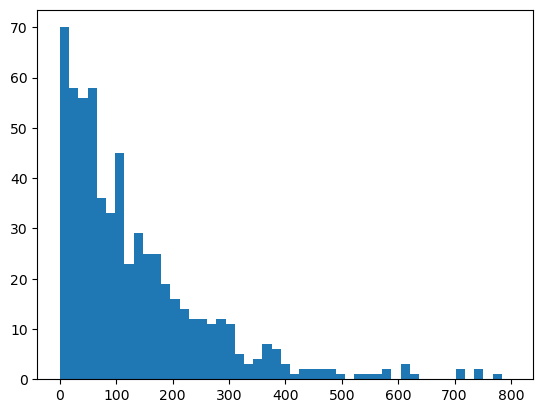

<Figure size 640x480 with 0 Axes>

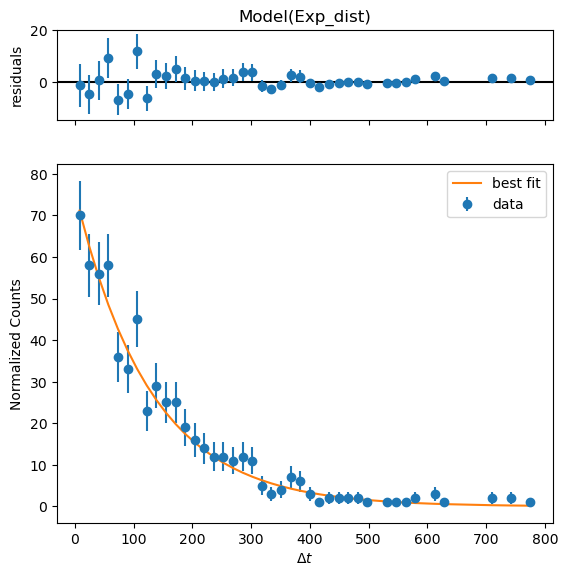

In [24]:
#### reading
times_up_short, times_down_short = read_times("27cmspace-0cmlead.txt")

lam0, lam0_err = fit_rate(*read_times("27cmspace-0cmlead.txt"))

3187
0.006237507578243881
3187
0.006237490340770616
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 49
    # variables        = 2
    chi-square         = 58.3319918
    reduced chi-square = 1.24110621
    Akaike info crit   = 12.5421890
    Bayesian info crit = 16.3258296
    R-squared          = 0.98929231
[[Variables]]
    lam:  0.00653945 +/- 1.4175e-04 (2.17%) (init = 0.006)
    s:    333.092130 +/- 9.68138205 (2.91%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(lam, s) = +0.7255


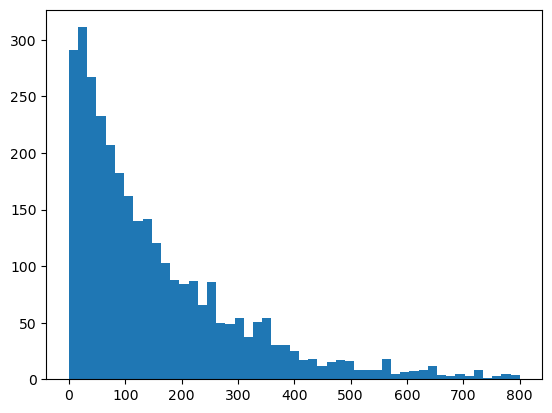

<Figure size 640x480 with 0 Axes>

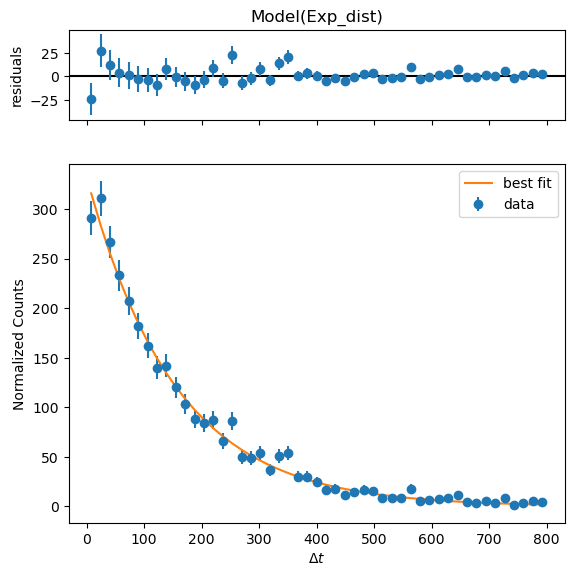

In [25]:
#### reading

lam5, lam5_err = fit_rate(*read_times("27cmspace-5cmlead.txt"), np.linspace(0,800,50))

2547
0.005840936547553398
2547
0.005840920714950069
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 49
    # variables        = 2
    chi-square         = 45.3096762
    reduced chi-square = 0.96403566
    Akaike info crit   = 0.16331538
    Bayesian info crit = 3.94695598
    R-squared          = 0.98977389
[[Variables]]
    lam:  0.00610455 +/- 1.2911e-04 (2.12%) (init = 0.006)
    s:    248.928119 +/- 7.06013954 (2.84%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(lam, s) = +0.7185


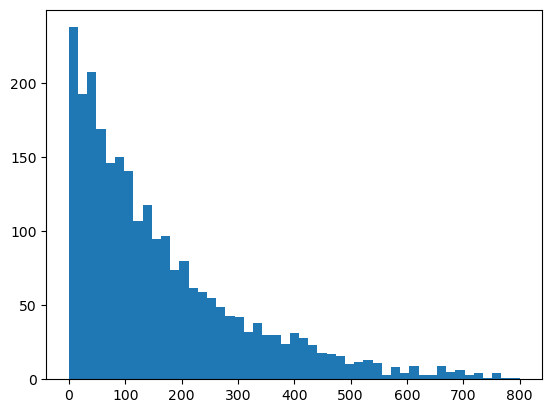

<Figure size 640x480 with 0 Axes>

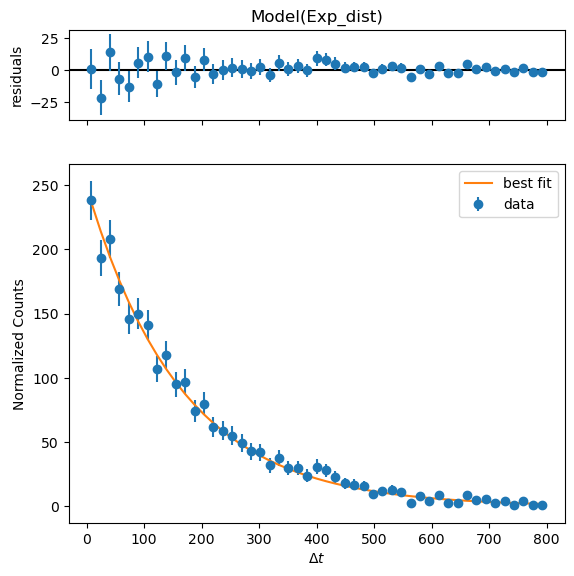

In [26]:
lam10, lam10_err = fit_rate(*read_times("27cmspace-10cmlead.txt"))

965
0.005602240180843332
965
0.0056022247322640205
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 44
    # variables        = 2
    chi-square         = 39.5611747
    reduced chi-square = 0.94193273
    Akaike info crit   = -0.67902305
    Bayesian info crit = 2.88935621
    R-squared          = 0.97770894
[[Variables]]
    lam:  0.00597705 +/- 2.1695e-04 (3.63%) (init = 0.006)
    s:    112.885694 +/- 5.37076427 (4.76%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(lam, s) = +0.7395


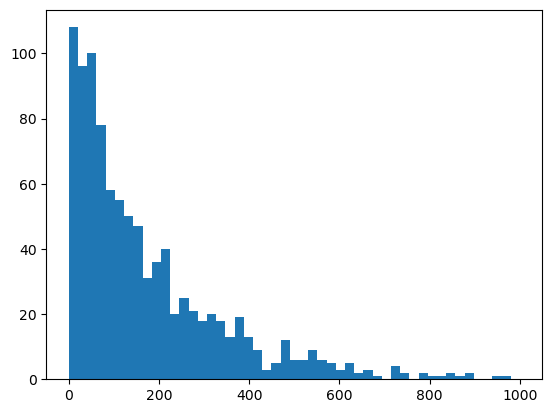

<Figure size 640x480 with 0 Axes>

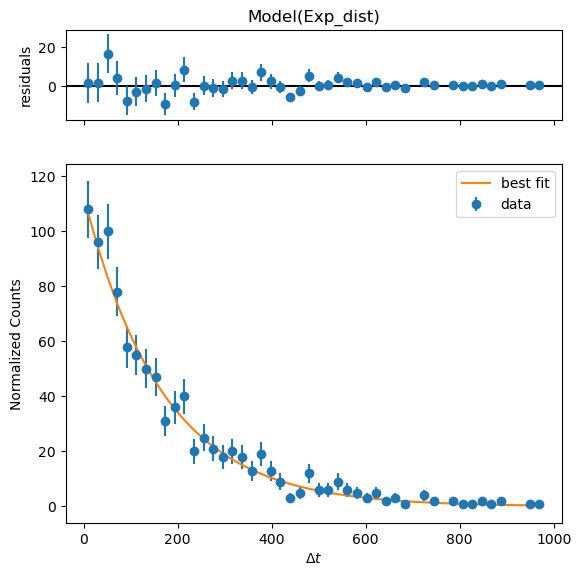

In [35]:
lam15, lam15_err = fit_rate(*read_times("27cmspace-15cmlead.txt"), np.linspace(0,1000,50))

In [36]:
lam_list = [lam0,lam5,lam10,lam15]
lam_err_list = [lam0_err,lam5_err,lam10_err,lam15_err]
thickness_list = [0,5,10,15]

<ErrorbarContainer object of 3 artists>

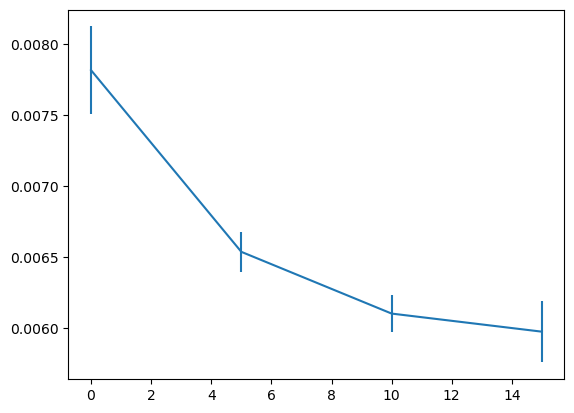

In [37]:
plt.errorbar(thickness_list, lam_list, lam_err_list)

In [38]:
rel_rates = [lam0/lam0,lam5/lam0,lam10/lam0,lam15/lam0]

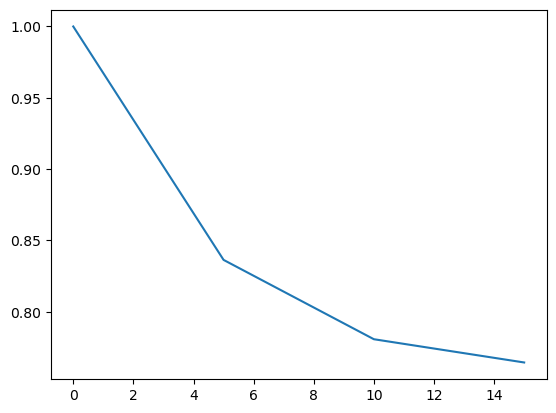

In [39]:
plt.plot(thickness_list, rel_rates)

In [40]:
print(lam_list)

[0.00781921732969893, 0.006539451049978224, 0.006104546751290339, 0.005977048304167995]


In [41]:
print(lam_err_list)

[0.00030759457199850104, 0.00014174621854696212, 0.0001291113539456181, 0.00021694550418269398]


In [63]:
def Poisson(k, mu, N):
    return N*np.pow(mu, k)*np.exp(-mu)/scipy.special.factorial(k)

def Poisson_large(k, mu, N):
    ## here we use Stirling's formula 
    ln_k_fact = k*np.log(k) - k + 0.5*np.log(2*np.pi*k)+np.log(1+1/k/12 + 1/k**2/288) 
    
    return N*np.exp(k*np.log(mu) - mu - ln_k_fact)

def Gaussian(x, mu, sigma, N):
    return N/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mu)**2/2/sigma**2)

In [113]:
from utils import Poisson, Poisson_large, Gaussian, Lorentzian, make_hist, plot_binned_fit, run_binned_fit
